In [ ]:
import numpy as np
import cv2
from imutils import paths
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report

In [ ]:
withMaskPath = "/content/drive/MyDrive/cattle/normal"
withoutMaskPath = "/content/drive/MyDrive/cattle/disease"
classes = ['diseased','normal']
classess = ['normal']

In [ ]:
withMaskImagePaths = list(paths.list_images(withMaskPath))
withoutMaskImagePaths = list(paths.list_images(withoutMaskPath))
print(withMaskImagePaths[:10])

['/content/drive/MyDrive/cattle/normal/93.jpg', '/content/drive/MyDrive/cattle/normal/download.jpg', '/content/drive/MyDrive/cattle/normal/images.jpg', '/content/drive/MyDrive/cattle/normal/images (1).jpg', '/content/drive/MyDrive/cattle/normal/download (1).jpg', '/content/drive/MyDrive/cattle/normal/images (2).jpg', '/content/drive/MyDrive/cattle/normal/images (3).jpg', '/content/drive/MyDrive/cattle/normal/211210-india-cow-mb-0818-dc4864.jpg', '/content/drive/MyDrive/cattle/normal/Happy_indian_cow_header.jpg', '/content/drive/MyDrive/cattle/normal/0a3a9f3f985ccfbf398c345807117cf8.jpg']


In [ ]:
x=[]
print('length of with mask data',len(withMaskImagePaths))
print('length of without mask data',len(withoutMaskImagePaths))
combinedDataset = withMaskImagePaths + withoutMaskImagePaths
print('length of combined dataset:',len(combinedDataset))
for imagePath in combinedDataset:
  print('imagePath:', imagePath)
  imageArray = cv2.imread(imagePath)
  imageSize = 50
  newImageArray  = cv2.resize(imageArray, (imageSize, imageSize))
  x.append(newImageArray)

length of with mask data 34
length of without mask data 40
length of combined dataset: 74
imagePath: /content/drive/MyDrive/cattle/normal/93.jpg
imagePath: /content/drive/MyDrive/cattle/normal/download.jpg
imagePath: /content/drive/MyDrive/cattle/normal/images.jpg
imagePath: /content/drive/MyDrive/cattle/normal/images (1).jpg
imagePath: /content/drive/MyDrive/cattle/normal/download (1).jpg
imagePath: /content/drive/MyDrive/cattle/normal/images (2).jpg
imagePath: /content/drive/MyDrive/cattle/normal/images (3).jpg
imagePath: /content/drive/MyDrive/cattle/normal/211210-india-cow-mb-0818-dc4864.jpg
imagePath: /content/drive/MyDrive/cattle/normal/Happy_indian_cow_header.jpg
imagePath: /content/drive/MyDrive/cattle/normal/0a3a9f3f985ccfbf398c345807117cf8.jpg
imagePath: /content/drive/MyDrive/cattle/normal/Eb6A_cyUYAEmfCF.jpg
imagePath: /content/drive/MyDrive/cattle/normal/white-cow-stamp-city.jpg
imagePath: /content/drive/MyDrive/cattle/normal/360_F_201503155_Y0INPN1ynyNLNb7y7lJFNUZ7jtLO4pW

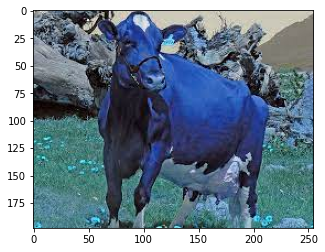

In [ ]:
for imagePath in withMaskImagePaths:
  imageArray = cv2.imread(imagePath)
  plt.imshow(imageArray)
  plt.show()
  break

(198, 255, 3)


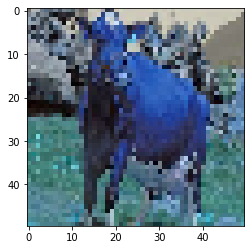

In [ ]:
print(imageArray.shape)
imageSize = 50
newImageArray = cv2.resize(imageArray,(imageSize,imageSize))
newImageArray.shape
plt.imshow(newImageArray)
plt.show()

In [ ]:
y = np.array([1]*len(withMaskImagePaths) + [0]*len(withoutMaskImagePaths))
x = np.array(x)
print('length of y:', len(y))
print('shape of x:', x.shape)
print('shape of y:', y.shape)

length of y: 74
shape of x: (74, 50, 50, 3)
shape of y: (74,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=1)
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', x_test.shape)
print('x_test shape', y_test.shape)

x_train shape (51, 50, 50, 3)
y_train shape (51,)
x_test shape (23, 50, 50, 3)
x_test shape (23,)


In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(50, 50, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
2/2 [==============================] - 1s 57ms/step - loss: 0.6682 - accuracy: 0.5686
Epoch 2/10
2/2 [==============================] - 0s 71ms/step - loss: 0.8752 - accuracy: 0.4706
Epoch 3/10
2/2 [==============================] - 0s 66ms/step - loss: 0.6342 - accuracy: 0.5294
Epoch 4/10
2/2 [==============================] - 0s 57ms/step - loss: 0.6783 - accuracy: 0.5294
Epoch 5/10
2/2 [==============================] - 0s 63ms/step - loss: 0.5833 - accuracy: 0.6863
Epoch 6/10
2/2 [==============================] - 0s 58ms/step - loss: 0.5829 - accuracy: 0.7451
Epoch 7/10
2/2 [==============================] - 0s 63ms/step - loss: 0.5568 - accuracy: 0.7843
Epoch 8/10
2/2 [==============================] - 0s 59ms/step - loss: 0.5024 - accuracy: 0.8627
Epoch 9/10
2/2 [==============================] - 0s 58ms/step - loss: 0.4633 - accuracy: 0.7647
Epoch 10/10
2/2 [==============================] - 0s 62ms/step - loss: 0.4124 - accuracy: 0.8824


In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 194ms/step - loss: 0.4338 - accuracy: 0.8261


[0.4338077902793884, 0.8260869383811951]

In [ ]:
y_preds = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_preds]
print('classfication report:' , classification_report(y_test, y_pred_classes))

classfication report:               precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.67      0.86      0.75         7

    accuracy                           0.83        23
   macro avg       0.80      0.83      0.81        23
weighted avg       0.85      0.83      0.83        23



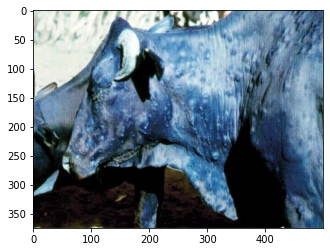

prediction: diseased


In [ ]:
imageArray = cv2.imread(withoutMaskImagePaths[34])
plt.imshow(imageArray)
plt.show()
image = np.array(newImageArray, dtype="float32")
image= np.expand_dims(image, axis=0)
prediction  = model.predict(image)
index = np.argmax(prediction[0],axis=0)
print('prediction:', classes[index])

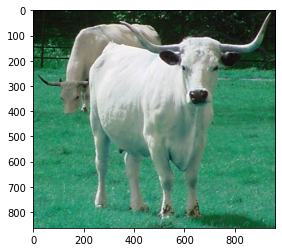

prediction: normal


In [ ]:
imageArray = cv2.imread(withMaskImagePaths[14])
plt.imshow(imageArray)
plt.show()
image = np.array(newImageArray, dtype="float32")
image= np.expand_dims(image, axis=0)
prediction  = model.predict(image)
index = np.argmax(prediction[0],axis=0)
print('prediction:', classess[index])

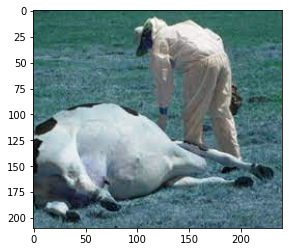

prediction: diseased


In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/cattle/image-classfication')
imageArray = cv2.imread(withoutMaskImagePaths[38])
plt.imshow(imageArray)
plt.show()
image = np.array(newImageArray, dtype="float32")
image= np.expand_dims(image, axis=0)
prediction  = new_model.predict(image)
index = np.argmax(prediction[0],axis=0)
print('prediction:', classes[index])

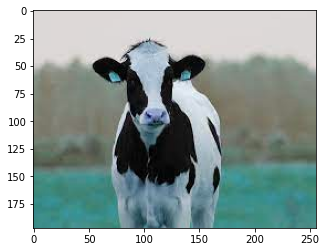

prediction: normal


In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/cattle/image-classfication')
imageArray = cv2.imread(withMaskImagePaths[22])
plt.imshow(imageArray)
plt.show()
image = np.array(newImageArray, dtype="float32")
image= np.expand_dims(image, axis=0)
prediction  = new_model.predict(image)
index = np.argmax(prediction[0],axis=0)
print('prediction:', classess[index])